In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [10]:
advertising = pd.read_csv('../datasets/advertising.csv')
advertising.head()
advertising.shape
advertising.info()
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

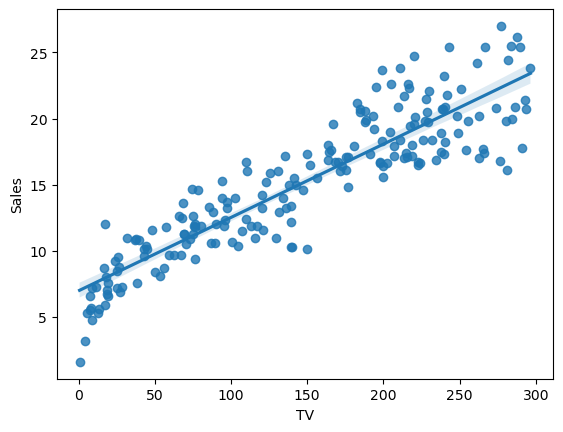

In [13]:
sns.regplot(x = 'TV', y= 'Sales', data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

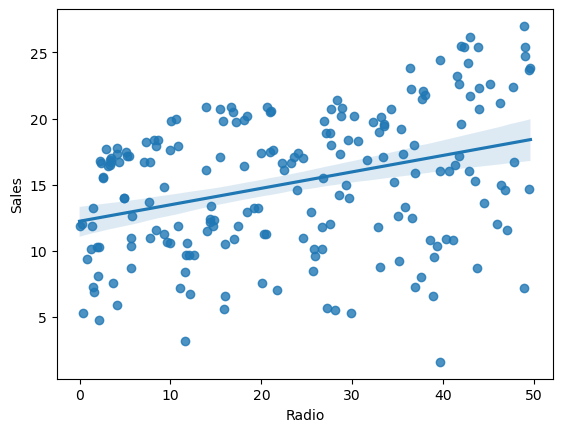

In [14]:
sns.regplot(x = 'Radio', y= 'Sales', data=advertising)

<Axes: xlabel='Newspaper', ylabel='Sales'>

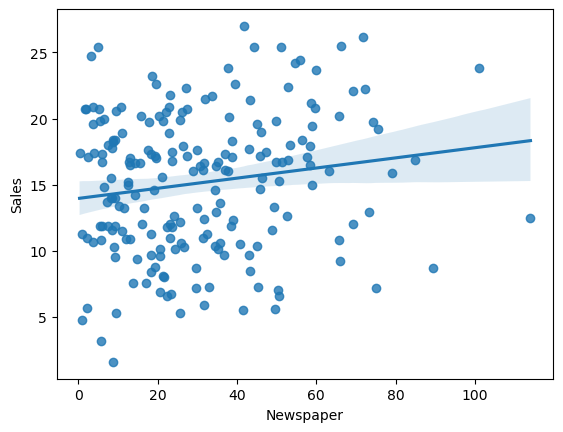

In [15]:
sns.regplot(x = 'Newspaper', y = 'Sales', data = advertising)

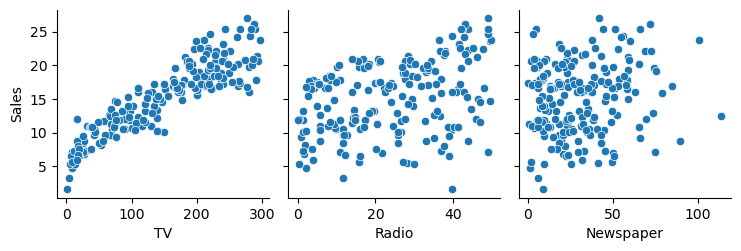

In [16]:
sns.pairplot(data = advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'])

<Axes: >

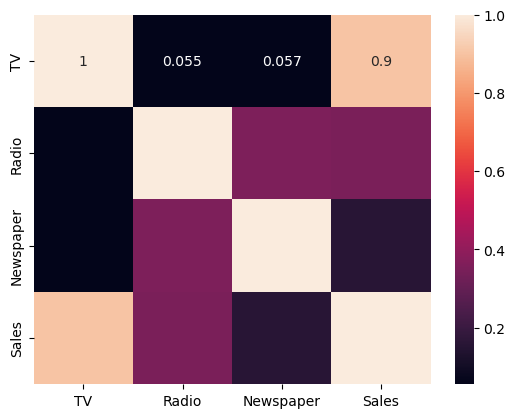

In [21]:
sns.heatmap(advertising.corr(), annot=True)

### Steps to be followed:

- Create X and Y
- Create Train(70%) and Test(30%) Sets
- Train the model on the Training Set - Learn the coefficients
- Evaluate the model on the Training and Test Set

In [23]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
X = advertising['TV']
y = advertising['Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 100)
X_train_with_intercept = sm.add_constant(X_train)
X_train_with_intercept

lr = sm.OLS(y_train, X_train_with_intercept)

In [39]:
lr = sm.OLS(y_train, X_train_with_intercept)
lr_model = lr.fit()

In [42]:
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.52e-52
Time:                        11:43:48   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Model
# y = 6.95 + 0.05 * TV

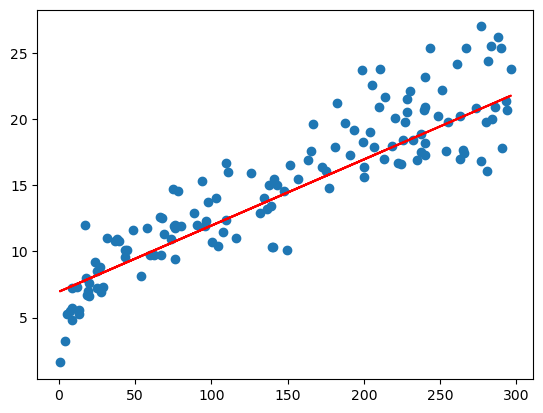

In [49]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.95 + 0.05 * X_train, 'red')
plt.show()

In [50]:
# y_train and y_train_predicted
# error = f(y_train, y_train_predicted)
y_train_predicted = lr_model.predict(X_train_with_intercept)
y_train_predicted

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: ylabel='Count'>

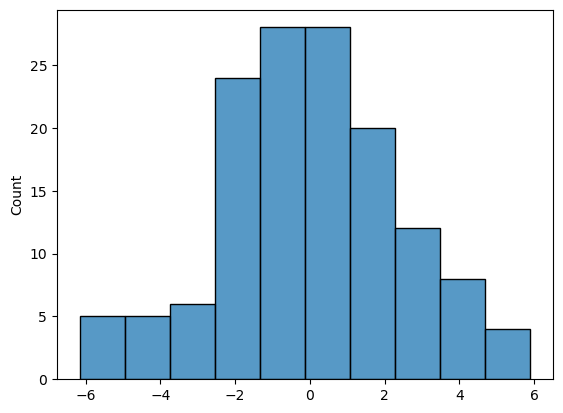

In [52]:
residuals = y_train - y_train_predicted
plt.figure()
sns.histplot(residuals)

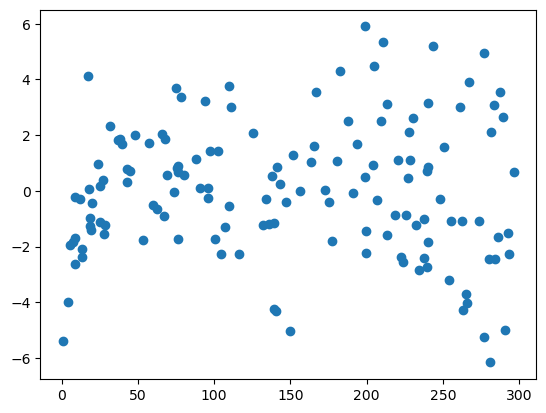

In [53]:
plt.scatter(X_train, residuals)

In [59]:
X_test_with_intercept = sm.add_constant(X_test)
y_test_predicted = lr_model.predict(X_test_with_intercept)

r2 = r2_score(y_test, y_test_predicted)
print('r2 on test: ', r2)

r2_train = r2_score(y_train, y_train_predicted)
print('r2 on train: ', r2_train)

print('MSE on test: ', mean_squared_error(y_test, y_test_predicted))

print('MSE on train: ', mean_squared_error(y_train, y_train_predicted))

r2 on test:  0.7921031601245658
r2 on train:  0.8157933136480389
MSE on test:  4.077556371826956
MSE on train:  5.752400386486835


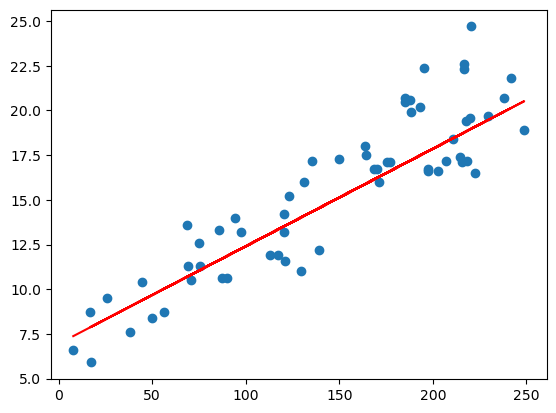

In [60]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_predicted, 'red')
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [69]:
lm = LinearRegression()
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

lm.fit(X_train_reshaped, y_train)
print('Coefficient is:', lm.coef_)
print('Intercept is :', lm.intercept_)

Coefficient is: [0.05454575]
Intercept is : 6.948683200001362


In [72]:
y_train_predicted = lm.predict(X_train_reshaped)
y_test_predicted = lm.predict(X_test_reshaped)

In [73]:
r2 = r2_score(y_test, y_test_predicted)
print('r2 on test: ', r2)

r2_train = r2_score(y_train, y_train_predicted)
print('r2 on train: ', r2_train)

r2 on test:  0.792103160124566
r2 on train:  0.8157933136480388
